In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from pathlib import Path
import numpy as np

In [5]:
path = Path(input("请输入路径："))

In [6]:
os.chdir(path)
print(f"当前路径为:{os.getcwd()}")

当前路径为:/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230420鞋垫测试


In [10]:
file = os.listdir()[1]

In [17]:
df = pd.read_csv(file)
L_data = df[df["part"]=="L"]
R_data = df[df["part"]=="R"]
R_data.columns

Index(['part', 'timestamp', 'gx', 'gy', 'gz', 'ax', 'ay', 'az', 'qw', 'qx',
       'qy', 'qz', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       'p11', 'p12', 'p1-c', 'p2-c', 'p3-c', 'p4-c', 'p5-c', 'p6-c', 'p7-c',
       'p8-c', 'p9-c', 'p10-c', 'p11-c', 'p12-c'],
      dtype='object')

In [18]:
sensors = ['p1-c', 'p2-c', 'p3-c', 'p4-c', 'p5-c', 'p6-c', 'p7-c',
       'p8-c', 'p9-c', 'p10-c', 'p11-c', 'p12-c']

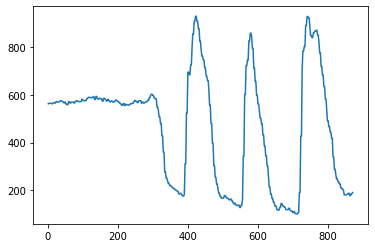

In [22]:
# 选择一个传感器
L_data["p1-c"].plot()
p1 = L_data["p1-c"]

In [91]:
# 以快跑 16km/h ，对应至少间隔 22 个数
peaks,_ = find_peaks(-p1,-500,width=20)
L_shape = p1.shape

In [167]:
# 选取第一个区间
range_start = peaks[0]
range_end = peaks[1]

In [168]:
# 选取区间内数值
snip_data= p1.iloc[range_start:range_end]
calibre_p1 = snip_data.apply(lambda x: x-p1.iloc[range_end])

<AxesSubplot:>

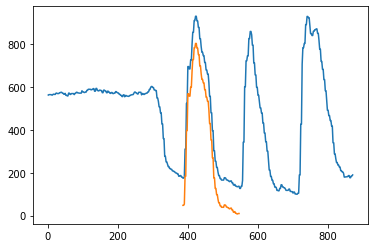

In [169]:
p1.plot()
calibre_p1.plot()